In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from collections import Counter
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.facecolor': 'white'}
pylab.rcParams.update(params)

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

def mad_outlier(data, thresh=3.5):
    data = data[:,None]
    med = np.median(data, axis=0)
    diff = np.sum((data - med)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_dev = np.median(diff)
    mod_z = 0.6745 * diff / med_abs_dev
    return mod_z > thresh

def pct_outlier(data, thresh=95):
    diff = (100 - thresh) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

def std_outlier(data, thresh=3):
    std = data.std()
    mu = data.mean()
    isOutlier = []
    for val in data:
        if abs(val-mu)/std > thresh:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

def vote_outlier(data):
    x = mad_outlier(data)
    y = pct_outlier(data)
    z = std_outlier(data)
    temp = list(zip(data.index, x, y, z))
    #temp = zip(data.index, x, y, z)
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in list(zip(axes, [mad_outlier, pct_outlier, std_outlier, vote_outlier])):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('MAD Outliers', **kwargs)
    axes[1].set_title('PCT Outliers', **kwargs)
    axes[2].set_title('STD Outliers', **kwargs)
    axes[3].set_title('Majority vote', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    
def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in list(zip(axes, [mad_outlier, pct_outlier, std_outlier, vote_outlier])):
        tfOutlier = list(zip(x, func(x)))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == False]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False) 
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('MAD Outliers removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('PCT Outliers removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD Outliers removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority voteOutliers: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

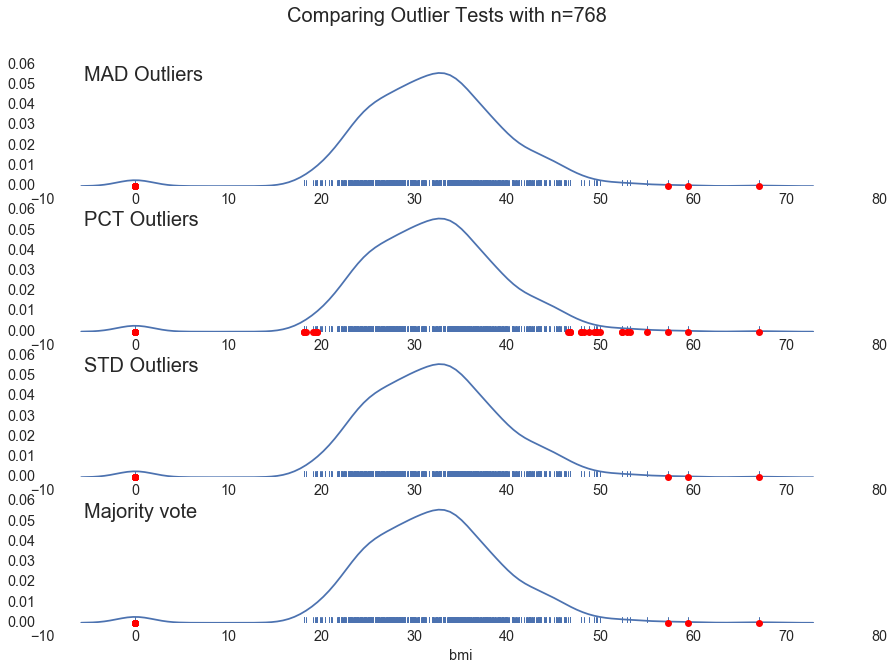

In [5]:
plotOutlier(pima.bmi)

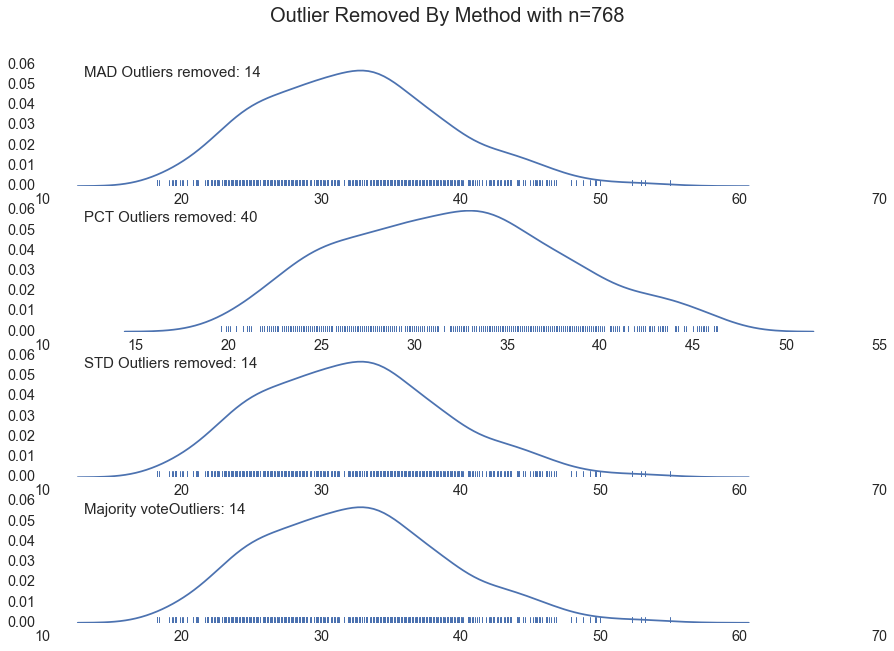

In [9]:
plotOutlierFree(pima.bmi)